# 6章

## パラメータの更新

### SGD (確率的勾配降下法、Stochastic Gradient Descent)

$$W \leftarrow W - \eta \frac{\partial L}{\partial W}$$

$W$は重みで、$L$は損失関数。$\eta$は学習率。

In [1]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

SGDは単純だけれども欠点がある。勾配の緩やかの方向への更新が遅いということ。関数が等方的でない伸びた形だと非効率な経路で更新していくことになる。

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

In [13]:
init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0

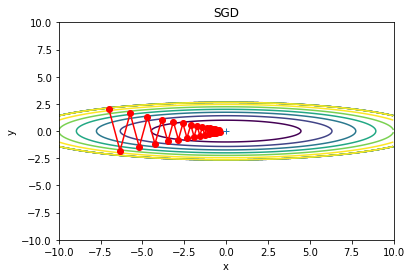

In [14]:
optimizer = SGD(lr=0.95)
x_history = []
y_history = []
params['x'], params['y'] = init_pos[0], init_pos[1]

for i in range(30):
    x_history.append(params['x'])
    y_history.append(params['y'])

    grads['x'], grads['y'] = df(params['x'], params['y'])
    optimizer.update(params, grads)


x = np.arange(-10, 10, 0.01)
y = np.arange(-5, 5, 0.01)

X, Y = np.meshgrid(x, y) 
Z = f(X, Y)

# for simple contour line  
mask = Z > 7
Z[mask] = 0

# plot 
plt.plot(x_history, y_history, 'o-', color="red")
plt.contour(X, Y, Z)
plt.ylim(-10, 10)
plt.xlim(-10, 10)
plt.plot(0, 0, '+')

plt.title("SGD")
plt.xlabel("x")
plt.ylabel("y")

plt.show()

### Momentum

$$
v \leftarrow \alpha v - \eta \frac{\partial L}{\partial W}\\
W \leftarrow W + v
$$

勾配方向に力を受けて速度が増していくイメージの式。$\alpha$倍しているのは摩擦や空気抵抗のイメージ($\alpha = 0.9$などの値を設定することになる)。

In [17]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]

In [18]:
init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0

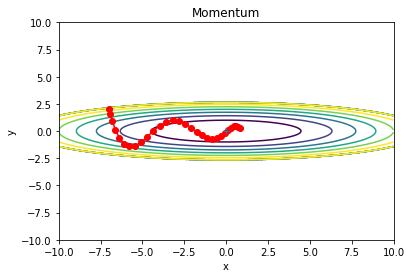

In [19]:
optimizer = Momentum(lr=0.1)
x_history = []
y_history = []
params['x'], params['y'] = init_pos[0], init_pos[1]

for i in range(30):
    x_history.append(params['x'])
    y_history.append(params['y'])

    grads['x'], grads['y'] = df(params['x'], params['y'])
    optimizer.update(params, grads)


x = np.arange(-10, 10, 0.01)
y = np.arange(-5, 5, 0.01)

X, Y = np.meshgrid(x, y) 
Z = f(X, Y)

# for simple contour line  
mask = Z > 7
Z[mask] = 0

# plot 
plt.plot(x_history, y_history, 'o-', color="red")
plt.contour(X, Y, Z)
plt.ylim(-10, 10)
plt.xlim(-10, 10)
plt.plot(0, 0, '+')

plt.title("Momentum")
plt.xlabel("x")
plt.ylabel("y")

plt.show()

勾配が緩やかなx方向でもずっと同じ方向に力がかかり続けるため速度が増して行くので、SGDに比べてx軸方向へ早く近づくことができている。ちょっと行き過ぎてる？

### AdaGrad

$$
h \leftarrow h + \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W}\\
W \leftarrow W - \eta \frac{1}{\sqrt{h}}\frac{\partial L}{\partial W}
$$


重みの二乗和を保持する$h$をもとに、損失関数の更新の学習率を減衰させていきます。
$\odot$は行列の要素ごとの掛け算です。

最初は大きく学習して次第に小さく更新していくというのはよくあるテクニックで、このAdaGradでは各重みのパラメータごとに個別に減衰させていくところが特徴です。
$\frac{1}{\sqrt{h}}$が何故良いのかは多分AdaGradの論文とかに書かれているのでしょうが、そこまで踏み込んで本には書かれていないので、これはこういうものだと思うことにします。
一応ちょっとだけ考察を付けておくと、$\frac{1}{\sqrt{h}}$は更新に使う損失関数の二乗和なので、過去に大きく更新をしたときほど、次の更新を大きく減衰させるようになっていますね。

このままでは学習率は減衰し続けていくので次第に学習できなくなってしまう。そのため二乗和を少しずつ過去のものを忘却させる工夫を施したものもあるようです。

In [23]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
    
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

In [21]:
init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0

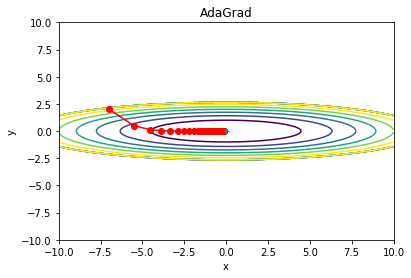

In [24]:
optimizer = AdaGrad(lr=1.5)
x_history = []
y_history = []
params['x'], params['y'] = init_pos[0], init_pos[1]

for i in range(30):
    x_history.append(params['x'])
    y_history.append(params['y'])

    grads['x'], grads['y'] = df(params['x'], params['y'])
    optimizer.update(params, grads)


x = np.arange(-10, 10, 0.01)
y = np.arange(-5, 5, 0.01)

X, Y = np.meshgrid(x, y) 
Z = f(X, Y)

# for simple contour line  
mask = Z > 7
Z[mask] = 0

# plot 
plt.plot(x_history, y_history, 'o-', color="red")
plt.contour(X, Y, Z)
plt.ylim(-10, 10)
plt.xlim(-10, 10)
plt.plot(0, 0, '+')

plt.title("AdaGrad")
plt.xlabel("x")
plt.ylabel("y")

plt.show()

今回の場合は非常に綺麗に最小値に向かって更新されていっています。

### Adam

MomentumのアイデアとAdaGradのアイデアを融合したような手法とのこと。

In [25]:
class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)

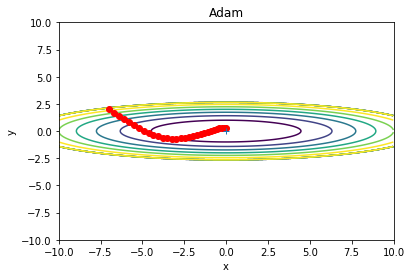

In [26]:
optimizer = Adam(lr=0.3)
x_history = []
y_history = []
params['x'], params['y'] = init_pos[0], init_pos[1]

for i in range(30):
    x_history.append(params['x'])
    y_history.append(params['y'])

    grads['x'], grads['y'] = df(params['x'], params['y'])
    optimizer.update(params, grads)


x = np.arange(-10, 10, 0.01)
y = np.arange(-5, 5, 0.01)

X, Y = np.meshgrid(x, y) 
Z = f(X, Y)

# for simple contour line  
mask = Z > 7
Z[mask] = 0

# plot 
plt.plot(x_history, y_history, 'o-', color="red")
plt.contour(X, Y, Z)
plt.ylim(-10, 10)
plt.xlim(-10, 10)
plt.plot(0, 0, '+')

plt.title("Adam")
plt.xlabel("x")
plt.ylabel("y")

plt.show()

AdamよりAdaGradのほうがきれいに最小値まで更新されていたように見えるけれども、それはこの問題ではの話。解くべき問題によって結果が変わってくるので問題に合わせて更新式を選ぶ必要があるようだ。

実際にMNISTデータセットでそれぞれの更新式で学習させてみる。

In [27]:
import os
import sys
sys.path.append(os.pardir)

In [28]:
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *

データセットの読み込み。

In [29]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

実験の設定。各種optimizerのインスタンスを作成し、実験するネットワークの構造を指定している。

In [30]:
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    

訓練の開始。

In [31]:
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

===========iteration:0===========
SGD:2.4125969537140914
Momentum:2.292566700536896
AdaGrad:2.2820354262880174
Adam:2.126833208294942
===========iteration:100===========
SGD:1.4077789325533003
Momentum:0.3625659749215997
AdaGrad:0.10446589655316404
Adam:0.2324851039626653
===========iteration:200===========
SGD:0.6258712807653897
Momentum:0.19937087554445435
AdaGrad:0.07592094111997719
Adam:0.12402344996415768
===========iteration:300===========
SGD:0.6173675873459361
Momentum:0.24633626541867354
AdaGrad:0.11031792526074956
Adam:0.19793797664972962
===========iteration:400===========
SGD:0.5063330863664326
Momentum:0.16797285328507017
AdaGrad:0.08368877256431927
Adam:0.1586869680867619
===========iteration:500===========
SGD:0.34749038438137375
Momentum:0.175845989194099
AdaGrad:0.07709664861959391
Adam:0.1563018933612583
===========iteration:600===========
SGD:0.3728524487305552
Momentum:0.17212437907690026
AdaGrad:0.1035231148209278
Adam:0.1199321257644056
===========iteration:700===

グラフを描画する。

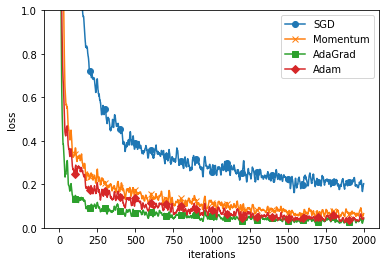

In [32]:
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

損失関数が小さくなるほど学習が進んでいる。SGDに比べると他の方法のほうが学習が早く、また最終的な精度まで差が出ているようだ。更新式によって時には最終的な精度にまで影響が出るものらしい。

他3つを比べると、この問題の場合にはAdaGradがわずかに学習が早いようだ。